In [1]:
# Initialize Otter
import otter
grader = otter.Notebook()

# Food Safety


In [2]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.style.use('fivethirtyeight')

import zipfile
import os # Used to interact with the file system

## Obtaining the Data





In [3]:
from pathlib import Path
data_dir = Path('.')
data_dir.mkdir(exist_ok = True)
file_path = data_dir / Path('data.zip')
dest_path = file_path

## 1: Loading Food Safety Data



## Question 1a: Looking Inside and Extracting the Zip Files

Assign `my_zip` to a `zipfile.Zipfile` object representing `data.zip`, and assign `list_names` to a list of all the names of the contents in `data.zip`.

Hint: The [Python docs](https://docs.python.org/3/library/zipfile.html) describe how to create a `zipfile.ZipFile` object.

<!--
BEGIN QUESTION
name: q1a
points: 1
-->

In [5]:
from zipfile import ZipFile
my_zip = ZipFile(dest_path)
list_names = my_zip.namelist()
list_names

['data/',
 'data/bus.csv',
 'data/ins.csv',
 'data/ins2vio.csv',
 'data/vio.csv',
 'data/sf_zipcodes.json',
 'data/legend.csv']

In [6]:
grader.check("q1a")

All tests passed!

In your answer above, if you have written something like `zipfile.ZipFile('data.zip', ...)`, we suggest changing it to read `zipfile.ZipFile(dest_path, ...)`. In general, we **strongly suggest having your filenames hard coded as string literals only once** in a notebook. It is very dangerous to hard code things twice because if you change one but forget to change the other, you can end up with bugs that are very hard to find.

Now display the files' names and their sizes. Format your solution by printing each file and its size on a new line.

If you're not sure how to proceed, read about the attributes of a `ZipFile` object in the Python docs linked above.

In [7]:
for x in my_zip.infolist():
    print(x.filename, x.file_size)

data/ 0
data/bus.csv 665365
data/ins.csv 1860919
data/ins2vio.csv 1032799
data/vio.csv 4213
data/sf_zipcodes.json 474
data/legend.csv 120


Often when working with zipped data, we'll never unzip the actual zipfile. This saves space on our local computer. However, for this project the files are small, so we're just going to unzip everything. This has the added benefit that you can look inside the csv files using a text editor, which might be handy for understanding the structure of the files. The cell below will unzip the csv files into a subdirectory called `data`. Simply run this cell, i.e. don't modify it.

In [8]:
data_dir = Path('.')
my_zip.extractall(data_dir)
!ls {data_dir / Path("data")}

bus.csv  ins2vio.csv  ins.csv  legend.csv  sf_zipcodes.json  vio.csv


The cell above created a folder called `data`, and in it there should be five CSV files. Let's open up `legend.csv` to see its contents. To do this, click on 'Jupyter' in the top left, then navigate to `fa20/proj/proj1/data/` and click on `legend.csv`. The file will open up in another tab. You should see something that looks like:

    "Minimum_Score","Maximum_Score","Description"
    0,70,"Poor"
    71,85,"Needs Improvement"
    86,90,"Adequate"
    91,100,"Good"

## Question 1b

The `legend.csv` file does indeed look like a well-formed CSV file. Let's check the other three files. Rather than opening up each file manually, let's use Python to print out the first 5 lines of each. The `ds100_utils` library has a method called `head` that will allow you to retrieve the first N lines of a file as a list. For example `ds100_utils.head('data/legend.csv', 5)` will return the first 5 lines of "data/legend.csv". Try using this function to print out the first 5 lines of all six files that we just extracted from the zipfile.

In [9]:
import ds100_utils
for x in my_zip.infolist():
    if not x.is_dir():
        print(ds100_utils.head(x.filename, 5))

['"business id column","name","address","city","state","postal_code","latitude","longitude","phone_number"\n', '"1000","HEUNG YUEN RESTAURANT","3279 22nd St","San Francisco","CA","94110","37.755282","-122.420493","-9999"\n', '"100010","ILLY CAFFE SF_PIER 39","PIER 39  K-106-B","San Francisco","CA","94133","-9999","-9999","+14154827284"\n', '"100017","AMICI\'S EAST COAST PIZZERIA","475 06th St","San Francisco","CA","94103","-9999","-9999","+14155279839"\n', '"100026","LOCAL CATERING","1566 CARROLL AVE","San Francisco","CA","94124","-9999","-9999","+14155860315"\n']
['"iid","date","score","type"\n', '"100010_20190329","03/29/2019 12:00:00 AM","-1","New Construction"\n', '"100010_20190403","04/03/2019 12:00:00 AM","100","Routine - Unscheduled"\n', '"100017_20190417","04/17/2019 12:00:00 AM","-1","New Ownership"\n', '"100017_20190816","08/16/2019 12:00:00 AM","91","Routine - Unscheduled"\n']
['"iid","vid"\n', '"97975_20190725","103124"\n', '"85986_20161011","103114"\n', '"95754_20190327","

## Question 1c: Reading in the Files

Based on the above information, let's attempt to load `bus.csv`, `ins2vio.csv`, `ins.csv`, and `vio.csv` into pandas dataframes with the following names: `bus`, `ins2vio`, `ins`, and `vio` respectively.

*Note:* Because of character encoding issues one of the files (`bus`) will require an additional argument `encoding='ISO-8859-1'` when calling `pd.read_csv`. At some point in your future, you should read all about [character encodings](https://diveintopython3.problemsolving.io/strings.html). We won't discuss these in detail in DS100.

In [10]:
# path to directory containing data

bus = pd.read_csv('data/bus.csv')
ins2vio = pd.read_csv('data/ins2vio.csv')
ins = pd.read_csv('data/ins.csv')
vio = pd.read_csv('data/vio.csv')


#This code is essential for the autograder to function properly. Do not edit
ins_test = ins

Now that you've read in the files, let's try some `pd.DataFrame` methods ([docs](https://pandas.pydata.org/pandas-docs/version/0.21/generated/pandas.DataFrame.html)).
Use the `DataFrame.head` method to show the top few lines of the `bus`, `ins`, and `vio` dataframes. To show multiple return outputs in one single cell, you can use `display()`. 

In [11]:
display(bus.head(),
ins2vio.head(),
ins.head(),
vio.head())

,business id column,name,address,city,state,postal_code,latitude,longitude,phone_number
0,1000,HEUNG YUEN RESTAURANT,3279 22nd St,San Francisco,CA,94110,37.755282,-122.420493,-9999
1,100010,ILLY CAFFE SF_PIER 39,PIER 39 K-106-B,San Francisco,CA,94133,-9999.000000,-9999.000000,14154827284
2,100017,AMICI'S EAST COAST PIZZERIA,475 06th St,San Francisco,CA,94103,-9999.000000,-9999.000000,14155279839
3,100026,LOCAL CATERING,1566 CARROLL AVE,San Francisco,CA,94124,-9999.000000,-9999.000000,14155860315
4,100030,OUI OUI! MACARON,2200 JERROLD AVE STE C,San Francisco,CA,94124,-9999.000000,-9999.000000,14159702675


,iid,vid
0,97975_20190725,103124
1,85986_20161011,103114
2,95754_20190327,103124
3,77005_20170429,103120
4,4794_20181030,103138


,iid,date,score,type
0,100010_20190329,03/29/2019 12:00:00 AM,-1,New Construction
1,100010_20190403,04/03/2019 12:00:00 AM,100,Routine - Unscheduled
2,100017_20190417,04/17/2019 12:00:00 AM,-1,New Ownership
3,100017_20190816,08/16/2019 12:00:00 AM,91,Routine - Unscheduled
4,100017_20190826,08/26/2019 12:00:00 AM,-1,Reinspection/Followup


,description,risk_category,vid
0,Consumer advisory not provided for raw or unde...,Moderate Risk,103128
1,Contaminated or adulterated food,High Risk,103108
2,Discharge from employee nose mouth or eye,Moderate Risk,103117
3,Employee eating or smoking,Moderate Risk,103118
4,Food in poor condition,Moderate Risk,103123


The `DataFrame.describe` method can also be handy for computing summaries of numeric columns of our dataframes. Try it out with each of our 4 dataframes.

In [12]:
bus.describe
ins.describe
vio.describe
ins2vio.describe

<bound method NDFrame.describe of                    iid     vid
0       97975_20190725  103124
1       85986_20161011  103114
2       95754_20190327  103124
3       77005_20170429  103120
4        4794_20181030  103138
...                ...     ...
40205   76958_20180919  103119
40206   80305_20190411  103149
40207   80233_20190417  103133
40208  100216_20190321  103119
40209   79430_20190418  103109

[40210 rows x 2 columns]>

Now, we perform some sanity checks for you to verify that you loaded the data with the right structure. Run the following cells to load some basic utilities (you do not need to change these at all):

First, we check the basic structure of the data frames you created:

In [13]:
assert all(bus.columns == ['business id column', 'name', 'address', 'city', 'state', 'postal_code',
                           'latitude', 'longitude', 'phone_number'])
assert 6250 <= len(bus) <= 6260

assert all(ins.columns == ['iid', 'date', 'score', 'type'])
assert 26660 <= len(ins) <= 26670

assert all(vio.columns == ['description', 'risk_category', 'vid'])
assert 60 <= len(vio) <= 65

assert all(ins2vio.columns == ['iid', 'vid'])
assert 40210 <= len(ins2vio) <= 40220

Next we'll check that the statistics match what we expect. The following are hard-coded statistical summaries of the correct data.

In [14]:
bus_summary = pd.DataFrame(**{'columns': ['business id column', 'latitude', 'longitude'],
 'data': {'business id column': {'50%': 75685.0, 'max': 102705.0, 'min': 19.0},
  'latitude': {'50%': -9999.0, 'max': 37.824494, 'min': -9999.0},
  'longitude': {'50%': -9999.0,
   'max': 0.0,
   'min': -9999.0}},
 'index': ['min', '50%', 'max']})

ins_summary = pd.DataFrame(**{'columns': ['score'],
 'data': {'score': {'50%': 76.0, 'max': 100.0, 'min': -1.0}},
 'index': ['min', '50%', 'max']})

vio_summary = pd.DataFrame(**{'columns': ['vid'],
 'data': {'vid': {'50%': 103135.0, 'max': 103177.0, 'min': 103102.0}},
 'index': ['min', '50%', 'max']})

from IPython.display import display

print('What we expect from your Businesses dataframe:')
display(bus_summary)
print('What we expect from your Inspections dataframe:')
display(ins_summary)
print('What we expect from your Violations dataframe:')
display(vio_summary)

What we expect from your Businesses dataframe:


,business id column,latitude,longitude
min,19.0,-9999.000000,-9999.0
50%,75685.0,-9999.000000,-9999.0
max,102705.0,37.824494,0.0


What we expect from your Inspections dataframe:


,score
min,-1.0
50%,76.0
max,100.0


What we expect from your Violations dataframe:


,vid
min,103102.0
50%,103135.0
max,103177.0


The code below defines a testing function that we'll use to verify that your data has the same statistics as what we expect. Run these cells to define the function. The `df_allclose` function has this name because we are verifying that all of the statistics for your dataframe are close to the expected values. Why not `df_allequal`? It's a bad idea in almost all cases to compare two floating point values like 37.780435, as rounding error can cause spurious failures.

## Question 1d: Verifying the data

Now let's run the automated tests. If your dataframes are correct, then the following cell will seem to do nothing, which is a good thing! However, if your variables don't match the correct answers in the main summary statistics shown above, an exception will be raised.

<!--
BEGIN QUESTION
name: q1d
points: 3
-->

In [15]:
"""Run this cell to load this utility comparison function that we will use in various
tests below (both tests you can see and those we run internally for grading).

Do not modify the function in any way.
"""


def df_allclose(actual, desired, columns=None, rtol=5e-2):
    """Compare selected columns of two dataframes on a few summary statistics.
    
    Compute the min, median and max of the two dataframes on the given columns, and compare
    that they match numerically to the given relative tolerance.
    
    If they don't match, an AssertionError is raised (by `numpy.testing`).
    """    
    # summary statistics to compare on
    stats = ['min', '50%', 'max']
    
    # For the desired values, we can provide a full DF with the same structure as
    # the actual data, or pre-computed summary statistics.
    # We assume a pre-computed summary was provided if columns is None. In that case, 
    # `desired` *must* have the same structure as the actual's summary
    if columns is None:
        des = desired
        columns = desired.columns
    else:
        des = desired[columns].describe().loc[stats]

    # Extract summary stats from actual DF
    act = actual[columns].describe().loc[stats]

    return np.allclose(act, des, rtol)

In [16]:
grader.check("q1d")

All tests passed!

### Question 1e: Identifying Issues with the Data

<!-- BEGIN QUESTION -->

Use the `head` command on your three files again. This time, describe at least one potential problem with the data you see. Consider issues with missing values and bad data.

<!--
BEGIN QUESTION
name: q1e
manual: True
points: 1
-->

There appears to be some missing data filled in with numbers like -99999 for latitude, longitude and phone number. Some of the scores have -1 as the score which is probably also just missing data and not an actual score.

<!-- END QUESTION -->



We will explore each file in turn, including determining its granularity and primary keys and exploring many of the variables individually. Let's begin with the businesses file, which has been read into the `bus` dataframe.

<br/><br/><br/>

---

<br/><br/><br/>

# 2: Examining the Business Data File

From its name alone, we expect the `bus.csv` file to contain information about the restaurants. Let's investigate the granularity of this dataset.

In [17]:
bus.head()

,business id column,name,address,city,state,postal_code,latitude,longitude,phone_number
0,1000,HEUNG YUEN RESTAURANT,3279 22nd St,San Francisco,CA,94110,37.755282,-122.420493,-9999
1,100010,ILLY CAFFE SF_PIER 39,PIER 39 K-106-B,San Francisco,CA,94133,-9999.000000,-9999.000000,14154827284
2,100017,AMICI'S EAST COAST PIZZERIA,475 06th St,San Francisco,CA,94103,-9999.000000,-9999.000000,14155279839
3,100026,LOCAL CATERING,1566 CARROLL AVE,San Francisco,CA,94124,-9999.000000,-9999.000000,14155860315
4,100030,OUI OUI! MACARON,2200 JERROLD AVE STE C,San Francisco,CA,94124,-9999.000000,-9999.000000,14159702675


<br/><br/><br/>

---

## Question 2a

The `bus` dataframe contains a column called `business id column` which probably corresponds to a unique business id.  However, let's first rename that column to `bid`.  Modify the `bus` dataframe by renaming that column to `bid`.

**Note**: In practice we might want to do this renaming when the table is loaded but for grading purposes we will do it here.

<!--
BEGIN QUESTION
name: q2a
points: 1
-->

In [18]:
bus = bus.rename({'business id column': 'bid'}, axis='columns')

In [19]:
grader.check("q2a")

All tests passed!

<br/><br/><br/>

---

## Question 2b

Examining the entries in `bus`, is the `bid` unique for each record (i.e. each row of data)? Your code should compute the answer, i.e. don't just hard code `True` or `False`.

Hint: use `value_counts()` or `unique()` to determine if the `bid` series has any duplicates.

<!--
BEGIN QUESTION
name: q2b
points: 1
-->

In [20]:
is_bid_unique = (bus.loc[:,'bid'].value_counts().size == bus.loc[:, 'bid'].size)

In [21]:
grader.check("q2b")

All tests passed!

<br/><br/><br/>

---


## Question 2c

In the two cells below create two **series** 

1. where the index is the `name` of the business and the value is the number of records with that `name`
2. where the index is the `address` of the business and the value is the number of records with that `address`

Order both series in descending order by count. You may need to use `groupby()`, `size()`, `sort_values()`, or `value_counts()`. 

**Step 1**

<!--
BEGIN QUESTION
name: q2ci
points: 1
-->

In [22]:
name_counts = bus.loc[:, 'name'].value_counts()
name_counts.head(20)

Peet's Coffee & Tea                                       20
Starbucks Coffee                                          13
Jamba Juice                                               10
McDonald's                                                10
Proper Food                                                9
STARBUCKS                                                  9
Mixt Greens/Mixt                                           8
Specialty's Cafe & Bakery                                  8
Whole Foods Market                                         7
Blue Bottle Coffee                                         7
Philz Coffee                                               7
Starbucks                                                  7
The Organic Coup                                           7
BlueStar Refreshment Services @ Uber Technologies, Inc     6
Lee's Deli                                                 6
Bon Appetit @ Twitter                                      6
STARBUCKS COFFEE        

In [23]:
grader.check("q2ci")

All tests passed!

**Step 2**

<!--
BEGIN QUESTION
name: q2cii
points: 1
-->

In [24]:
address_counts = bus.loc[:, 'address'].value_counts()
address_counts.head(10)

Off The Grid              39
428 11th St               34
3251 20th Ave             17
2948 Folsom St            17
Pier 41                   16
103 Horne Ave             14
24 Willie Mays Plaza      13
Off the Grid              11
2948 Folsom St.           10
1 United Nations Plaza    10
Name: address, dtype: int64

In [25]:
grader.check("q2cii")

All tests passed!

<br/><br/><br/>

---


## Question 2d

Based on the above calculations answer each of the following questions by filling the value in the variable.

1. What does each record represent?  
1. What is the minimal primary key?

<!--
BEGIN QUESTION
name: q2d
points: 2
-->

In [26]:
# What does each record represent?  Valid answers are:
#    "One location of a restaurant."
#    "A chain of restaurants."
#    "A city block."
q2d_part1 = "One location of a restaurant."

# What is the minimal primary key? Valid answers are:
#    "bid"
#    "bid, name"
#    "bid, name, address"
q2d_part2 = "bid"

In [27]:
grader.check("q2d")

All tests passed!

<br/><br/><br/>

---

<br/><br/><br/>

# 3: Cleaning the Business Data Postal Codes

The business data contains postal code information that we can use to aggregate the ratings over regions of the city.  Let's examine and clean the postal code field.  The postal code (sometimes also called a ZIP code) partitions the city into regions:

<img src="https://www.usmapguide.com/wp-content/uploads/2019/03/printable-san-francisco-zip-code-map.jpg" alt="ZIP Code Map" style="width: 600px">

<br/><br/><br/>

---


## Question 3a

How many restaurants are in each ZIP code? 

In the cell below, create a **series** where the index is the postal code and the value is the number of records with that postal code in descending order of count. You may need to use `groupby()`, `size()`, or `value_counts()`. Do you notice any odd/invalid zip codes?

<!--
BEGIN QUESTION
name: q3a
points: 1
-->

In [28]:
zip_counts = bus.loc[:,'postal_code'].value_counts()
print(zip_counts.to_string())

94103         562
94110         555
94102         456
94107         408
94133         398
94109         382
94111         259
94122         255
94105         249
94118         231
94115         230
94108         229
94124         218
94114         200
-9999         194
94112         192
94117         189
94123         177
94121         157
94104         142
94132         132
94116          97
94158          90
94134          82
94127          67
94131          49
94130           8
94143           5
94013           2
94101           2
94301           2
94188           2
CA              2
95109           1
94901           1
941102019       1
941033148       1
95117           1
94621           1
94080           1
95112           1
64110           1
95105           1
941             1
94122-1909      1
95122           1
94124-1917      1
94102-5917      1
00000           1
Ca              1
95132           1
92672           1
95133           1
94120           1
94129           1
94105-1420

In [29]:
grader.check("q3a")

All tests passed!

<br/><br/><br/>

--- 

## Question 3b

Answer the following questions about the `postal_code` column in the `bus` dataframe.

1. The ZIP code column is which of the following type of data:
    1. Quantitative Continuous
    1. Quantitative Discrete
    1. Qualitative Ordinal
    1. Qualitative Nominal    
1. What Python data type is used to represent a ZIP code?

*Note*: ZIP codes and postal codes are the same thing.

Please write your answers in the variables below:

<!--
BEGIN QUESTION
name: q3b
points: 2
-->

In [30]:
# The ZIP code column is which of the following type of data:
#   "Quantitative Continuous" 
#   "Quantitative Discrete"
#   "Qualitative Ordinal"
#   "Qualitative Nominal"
q3b_part1 = "Quantitative Discrete"

# What Python data type is used to represent a ZIP code? 
#    "str"
#    "int"
#    "bool"
#    "float"
q3b_part2 = "int"

In [31]:
grader.check("q3b")

All tests passed!

<br/><br/><br/>

--- 

## Question 3c

In question 3a we noticed a large number of potentially invalid ZIP codes (e.g., "Ca").  These are likely due to data entry errors.  To get a better understanding of the potential errors in the zip codes we will:

1. Import a list of valid San Francisco ZIP codes by using `pd.read_json` to load the file `data/sf_zipcodes.json` and extract a **series** of type `str` containing the valid ZIP codes.  *Hint: set `dtype` when invoking `read_json`.*
1. Construct a `DataFrame` containing only the businesses which DO NOT have valid ZIP codes.  You will probably want to use the `Series.isin` function. 


**Step 1**

<!--
BEGIN QUESTION
name: q3ci
points: 1
-->

In [32]:
valid_zips = pd.read_json('data/sf_zipcodes.json', dtype=str)['zip_codes']
valid_zips.head()

0    94102
1    94103
2    94104
3    94105
4    94107
Name: zip_codes, dtype: object

In [33]:
grader.check("q3ci")

All tests passed!

**Step 2**

<!--
BEGIN QUESTION
name: q3cii
points: 1
-->

In [34]:
invalid_zip_bus = bus[(~bus['postal_code'].isin(valid_zips))]
invalid_zip_bus.head(20)

,bid,name,address,city,state,postal_code,latitude,longitude,phone_number
22,100126,Lamas Peruvian Food Truck,Private Location,San Francisco,CA,-9999,-9999.000000,-9999.000000,-9999
68,100417,"COMPASS ONE, LLC",1 MARKET ST. FL,San Francisco,CA,94105-1420,-9999.000000,-9999.000000,14154324000
96,100660,TEAPENTER,1518 IRVING ST,San Francisco,CA,94122-1909,-9999.000000,-9999.000000,14155868318
109,100781,LE CAFE DU SOLEIL,200 FILLMORE ST,San Francisco,CA,94117-3504,-9999.000000,-9999.000000,14155614215
144,101084,Deli North 200,1 Warriors Way Level 300 North East,San Francisco,CA,94518,-9999.000000,-9999.000000,-9999
156,101129,Vendor Room 200,1 Warriors Way Level 300 South West,San Francisco,CA,-9999,-9999.000000,-9999.000000,-9999
177,101192,Cochinita #2,2 Marina Blvd Fort Mason,San Francisco,CA,-9999,-9999.000000,-9999.000000,14150429222
276,102014,"DROPBOX (Section 3, Floor 7)",1800 Owens St,San Francisco,CA,-9999,-9999.000000,-9999.000000,-9999
295,102245,Vessell CA Operations (#4),2351 Mission St,San Francisco,CA,-9999,-9999.000000,-9999.000000,-9999
298,10227,The Napper Tandy,3200 24th St,San Francisco,CA,-9999,37.752581,-122.416482,-9999


In [35]:
grader.check("q3cii")

All tests passed!

<br/><br/><br/>

--- 

## Question 3d

In the previous question, many of the businesses had a common invalid postal code that was likely used to encode a MISSING postal code.  Do they all share a potentially "interesting address"?

In the following cell, construct a **series** that counts the number of businesses at each `address` that have this single likely MISSING postal code value.  Order the series in descending order by count. 

After examining the output.  Answer the following question by filling in the appropriate variable. If we were to drop businesses with MISSING postal code values would a particular class of business be affected?  If you are unsure try to search the web for the most common addresses.


<!--
BEGIN QUESTION
name: q3d
points: 3
-->

In [36]:
missing_zip_address_count = invalid_zip_bus[(invalid_zip_bus['postal_code'] == '-9999')]['address'].value_counts()
missing_zip_address_count.head()

Off The Grid                  39
Off the Grid                  10
OTG                            4
Approved Private Locations     3
OFF THE GRID                   3
Name: address, dtype: int64

In [37]:
grader.check("q3d")

All tests passed!

<br/><br/><br/>

--- 

## Question 3e

**True or False**:  *If we were to drop businesses with MISSING postal code values, a particular class of business will be affected.*

<!--
BEGIN QUESTION
name: q3e
points: 2
-->

In [38]:
# True or False: 
#  If we were to drop businesses with MISSING postal code values 
#   a particular class of business be affected.
q3d_true_or_false = True

In [39]:
grader.check("q3e")

All tests passed!

<br/><br/><br/>

--- 

## Question 3f

Examine the `invalid_zip_bus` dataframe we computed above and look at the businesses that DO NOT have the special MISSING ZIP code value.  Some of the invalid postal codes are just the full 9 digit code rather than the first 5 digits.  Create a new column named `postal5` in the original `bus` dataframe which contains only the first 5 digits of the `postal_code` column.   Finally, for any of the `postal5` ZIP code entries that were not a valid San Fransisco ZIP Code (according to `valid_zips`) set the entry to `None`.  


<!--
BEGIN QUESTION
name: q3f
points: 2
-->

In [40]:
def postal5(zip):
    return zip[:5]
bus['postal5'] = None
bus['postal5'] = bus['postal_code'].apply(postal5)
bus['postal5'] = bus['postal5'][bus['postal5'].isin(valid_zips)]

#print((bus['postal5'].str.len() != 5).sum())
# Checking the corrected postal5 column
bus.loc[invalid_zip_bus.index, ['bid', 'name', 'postal_code', 'postal5']]

,bid,name,postal_code,postal5
22,100126,Lamas Peruvian Food Truck,-9999,NaN
68,100417,"COMPASS ONE, LLC",94105-1420,94105
96,100660,TEAPENTER,94122-1909,94122
109,100781,LE CAFE DU SOLEIL,94117-3504,94117
144,101084,Deli North 200,94518,NaN
...,...,...,...,...
6173,99369,HOTEL BIRON,94102-5917,94102
6174,99376,Mashallah Halal Food truck Ind,-9999,NaN
6199,99536,FAITH SANDWICH #2,94105-2907,94105
6204,99681,Twister,95112,NaN


In [41]:
grader.check("q3f")

All tests passed!

<br/><br/><br/>

---

<br/><br/><br/>

# 4: Investigate the Inspection Data

Let's now turn to the inspection DataFrame. Earlier, we found that `ins` has 4 columns named 
`iid`, `score`, `date` and `type`.  In this section, we determine the granularity of `ins` and investigate the kinds of information provided for the inspections. 

Let's start by looking again at the first 5 rows of `ins` to see what we're working with.

In [42]:
ins.head(5)

,iid,date,score,type
0,100010_20190329,03/29/2019 12:00:00 AM,-1,New Construction
1,100010_20190403,04/03/2019 12:00:00 AM,100,Routine - Unscheduled
2,100017_20190417,04/17/2019 12:00:00 AM,-1,New Ownership
3,100017_20190816,08/16/2019 12:00:00 AM,91,Routine - Unscheduled
4,100017_20190826,08/26/2019 12:00:00 AM,-1,Reinspection/Followup


<br/><br/><br/>

---

## Question 4a

The column `iid` probably corresponds to an inspection id.  Is it a primary key?  Write an expression (line of code) that evaluates to 'True' or 'False' based on whether all the values are unique.


<!--
BEGIN QUESTION
name: q4a
points: 1
-->

In [43]:
is_ins_iid_a_primary_key = ins.index.has_duplicates

In [44]:
grader.check("q4a")

All tests passed!

<br/><br/><br/>

---

## Question 4b

The column `iid` appears to be the composition of two numbers and the first number looks like a business id.  

**Part 1.**: Create a new column called `bid` in the `ins` dataframe containing just the business id.  You will want to use `ins['iid'].str` operations to do this.  Also be sure to convert the type of this column to `int`

**Part 2.**: Then compute how many values in this new column are invalid business ids (i.e. do not appear in the `bus['bid']` column). This is verifying a foreign key relationship. Consider using the `pd.Series.isin` function.

**Part 3.**: Answer True or False, `ins['bid']` is a foreign key reference to `bus['bid']`.


**No python `for` loops or list comprehensions required!**

**Part 1**

<!--
BEGIN QUESTION
name: q4bi
points: 1
-->

In [45]:

ins['bid'] = ins.loc[:,'iid'].str.split("_")
def getFirst(lst):
    return lst[0]
ins['bid'] = ins.loc[:,'bid'].apply(getFirst)
ins['bid'] = ins.loc[:,'bid'].apply(pd.to_numeric)
ins.head(5)

,iid,date,score,type,bid
0,100010_20190329,03/29/2019 12:00:00 AM,-1,New Construction,100010
1,100010_20190403,04/03/2019 12:00:00 AM,100,Routine - Unscheduled,100010
2,100017_20190417,04/17/2019 12:00:00 AM,-1,New Ownership,100017
3,100017_20190816,08/16/2019 12:00:00 AM,91,Routine - Unscheduled,100017
4,100017_20190826,08/26/2019 12:00:00 AM,-1,Reinspection/Followup,100017


In [46]:
grader.check("q4bi")

All tests passed!

**Part 2**

<!--
BEGIN QUESTION
name: q4bii
points: 1
-->

In [47]:
invalid_bid_count = ins[(~ins['bid'].isin(bus['bid']))].size
ins.head(5)

,iid,date,score,type,bid
0,100010_20190329,03/29/2019 12:00:00 AM,-1,New Construction,100010
1,100010_20190403,04/03/2019 12:00:00 AM,100,Routine - Unscheduled,100010
2,100017_20190417,04/17/2019 12:00:00 AM,-1,New Ownership,100017
3,100017_20190816,08/16/2019 12:00:00 AM,91,Routine - Unscheduled,100017
4,100017_20190826,08/26/2019 12:00:00 AM,-1,Reinspection/Followup,100017


In [48]:
grader.check("q4bii")

All tests passed!

**Part 3**

<!--
BEGIN QUESTION
name: q4biii
points: 1
-->

In [49]:
# True or False: The column ins['bid'] is a foreign key 
#   referencing the bus['bid'] primary key.

q4b_is_foreign_key = True 

In [50]:
grader.check("q4biii")

All tests passed!

<br/><br/><br/>

---

## Question 4c

What if we are interested in a time component of the inspection data?  We need to examine the date column of each inspection. 

**Part 1:** What is the type of the individual `ins['date']` entries. You may want to grab the very first entry and use the `type` function in python. 

**Part 2:** Use `pd.to_datetime` to create a new `ins['timestamp']` column containing of `pd.Timestamp` objects.  These will allow us to do more date manipulation.

**Part 3:** What are the earliest and latest dates in our inspection data?  *Hint: you can use `min` and `max` on dates of the correct type.*

**Part 4:** We probably want to examine the inspections by year. Create an additional `ins['year']` column containing just the year of the inspection.  Consider using `pd.Series.dt.year` to do this.

**No python `for` loops or list comprehensions required!**

**Part 1**

<!--
BEGIN QUESTION
name: q4ci
points: 1
-->

In [51]:
x = ins.iloc[0, 1]
ins_date_type = type(x)
ins_date_type

str

In [52]:
grader.check("q4ci")

All tests passed!

**Part 2**

<!--
BEGIN QUESTION
name: q4cii
points: 1
-->

In [53]:
ins['timestamp'] = ins.loc[:,'date'].apply(pd.to_datetime)

In [54]:
grader.check("q4cii")

All tests passed!

**Part 3**

<!--
BEGIN QUESTION
name: q4ciii
points: 1
-->

In [55]:
earliest_date = max(ins['timestamp'])
latest_date = min(ins['timestamp'])

print("Earliest Date:", earliest_date)
print("Latest Date:", latest_date)

Earliest Date: 2019-11-28 00:00:00
Latest Date: 2016-10-04 00:00:00


In [56]:
grader.check("q4ciii")

All tests passed!

**Part 4**

<!--
BEGIN QUESTION
name: q4civ
points: 1
-->

In [57]:
ins['year'] = ins['timestamp'].dt.year


In [58]:
grader.check("q4civ")

All tests passed!

In [59]:
ins.head()

,iid,date,score,type,bid,timestamp,year
0,100010_20190329,03/29/2019 12:00:00 AM,-1,New Construction,100010,2019-03-29,2019
1,100010_20190403,04/03/2019 12:00:00 AM,100,Routine - Unscheduled,100010,2019-04-03,2019
2,100017_20190417,04/17/2019 12:00:00 AM,-1,New Ownership,100017,2019-04-17,2019
3,100017_20190816,08/16/2019 12:00:00 AM,91,Routine - Unscheduled,100017,2019-08-16,2019
4,100017_20190826,08/26/2019 12:00:00 AM,-1,Reinspection/Followup,100017,2019-08-26,2019


<br/><br/><br/>

---

## Question 4d

What is the relationship between the type of inspection over the 2016 to 2019 timeframe? 

**Part 1**

Construct the following table by
1. Using the `pivot_table` containing the number (`size`) of inspections for the given `type` and `year`.
1. Adding an extra `Total` column to the result using `sum`
1. Sort the results in descending order by the `Total`.

<table border="1" class="dataframe">  <thead>    <tr style="text-align: right;">      <th>year</th>      <th>2016</th>      <th>2017</th>      <th>2018</th>      <th>2019</th>      <th>Total</th>    </tr>    <tr>      <th>type</th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>    </tr>  </thead>  <tbody>    <tr>      <th>Routine - Unscheduled</th>      <td>966</td>      <td>4057</td>      <td>4373</td>      <td>4681</td>      <td>14077</td>    </tr>    <tr>      <th>Reinspection/Followup</th>      <td>445</td>      <td>1767</td>      <td>1935</td>      <td>2292</td>      <td>6439</td>    </tr>    <tr>      <th>New Ownership</th>      <td>99</td>      <td>506</td>      <td>528</td>      <td>459</td>      <td>1592</td>    </tr>    <tr>      <th>Complaint</th>      <td>91</td>      <td>418</td>      <td>512</td>      <td>437</td>      <td>1458</td>    </tr>    <tr>      <th>New Construction</th>      <td>102</td>      <td>485</td>      <td>218</td>      <td>189</td>      <td>994</td>    </tr>    <tr>      <th>Non-inspection site visit</th>      <td>51</td>      <td>276</td>      <td>253</td>      <td>231</td>      <td>811</td>    </tr>    <tr>      <th>New Ownership - Followup</th>      <td>0</td>      <td>45</td>      <td>219</td>      <td>235</td>      <td>499</td>    </tr>    <tr>      <th>Structural Inspection</th>      <td>1</td>      <td>153</td>      <td>50</td>      <td>190</td>      <td>394</td>    </tr>    <tr>      <th>Complaint Reinspection/Followup</th>      <td>19</td>      <td>68</td>      <td>70</td>      <td>70</td>      <td>227</td>    </tr>    <tr>      <th>Foodborne Illness Investigation</th>      <td>1</td>      <td>29</td>      <td>50</td>      <td>35</td>      <td>115</td>    </tr>    <tr>      <th>Routine - Scheduled</th>      <td>0</td>      <td>9</td>      <td>8</td>      <td>29</td>      <td>46</td>    </tr>    <tr>      <th>Administrative or Document Review</th>      <td>2</td>      <td>1</td>      <td>1</td>      <td>0</td>      <td>4</td>    </tr>    <tr>      <th>Multi-agency Investigation</th>      <td>0</td>      <td>0</td>      <td>1</td>      <td>2</td>      <td>3</td>    </tr>    <tr>      <th>Special Event</th>      <td>0</td>      <td>3</td>      <td>0</td>      <td>0</td>      <td>3</td>    </tr>    <tr>      <th>Community Health Assessment</th>      <td>1</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>1</td>    </tr>  </tbody></table>

**No python `for` loops or list comprehensions required!**

In [60]:

ins_pivot = ins.groupby(['year', 'type']).count()
ins_pivot_table = ins_pivot.pivot_table(index='type', columns='year', values='iid', aggfunc=np.max, fill_value=0)
ins_pivot_table['Total'] = ins_pivot_table.sum(axis=1)
ins_pivot_sorted = ins_pivot_table.sort_values('Total', ascending=False)



In [61]:
grader.check("q4di")

All tests passed!

**Part 2**

Based on the above analysis, which year appears to have had a lot of businesses in newly constructed buildings?
<!--
BEGIN QUESTION
name: q4dii
points: 2
-->

In [62]:
year_of_new_construction = 2017

In [63]:
grader.check("q4dii")

All tests passed!

<br/><br/><br/>

---

## Question 4e

Let's examine the inspection scores `ins['score']`



In [64]:
ins['score'].value_counts().head()

-1      12632
 100     1993
 96      1681
 92      1260
 94      1250
Name: score, dtype: int64

There are a large number of inspections with the `'score'` of `-1`.   These are probably missing values.  Let's see what type of inspections have scores and which do not. Create the following dataframe using steps similar to the previous question, and assign it to to the variable `ins_missing_score_pivot`.

You should observe that inspection scores appear only to be assigned to `Routine - Unscheduled` inspections.


<table border="1" class="dataframe">  <thead>    <tr style="text-align: right;">      <th>Missing Score</th>      <th>False</th>      <th>True</th>      <th>Total</th>    </tr>    <tr>      <th>type</th>      <th></th>      <th></th>      <th></th>    </tr>  </thead>  <tbody>    <tr>      <th>Routine - Unscheduled</th>      <td>14031</td>      <td>46</td>      <td>14077</td>    </tr>    <tr>      <th>Reinspection/Followup</th>      <td>0</td>      <td>6439</td>      <td>6439</td>    </tr>    <tr>      <th>New Ownership</th>      <td>0</td>      <td>1592</td>      <td>1592</td>    </tr>    <tr>      <th>Complaint</th>      <td>0</td>      <td>1458</td>      <td>1458</td>    </tr>    <tr>      <th>New Construction</th>      <td>0</td>      <td>994</td>      <td>994</td>    </tr>    <tr>      <th>Non-inspection site visit</th>      <td>0</td>      <td>811</td>      <td>811</td>    </tr>    <tr>      <th>New Ownership - Followup</th>      <td>0</td>      <td>499</td>      <td>499</td>    </tr>    <tr>      <th>Structural Inspection</th>      <td>0</td>      <td>394</td>      <td>394</td>    </tr>    <tr>      <th>Complaint Reinspection/Followup</th>      <td>0</td>      <td>227</td>      <td>227</td>    </tr>    <tr>      <th>Foodborne Illness Investigation</th>      <td>0</td>      <td>115</td>      <td>115</td>    </tr>    <tr>      <th>Routine - Scheduled</th>      <td>0</td>      <td>46</td>      <td>46</td>    </tr>    <tr>      <th>Administrative or Document Review</th>      <td>0</td>      <td>4</td>      <td>4</td>    </tr>    <tr>      <th>Multi-agency Investigation</th>      <td>0</td>      <td>3</td>      <td>3</td>    </tr>    <tr>      <th>Special Event</th>      <td>0</td>      <td>3</td>      <td>3</td>    </tr>    <tr>      <th>Community Health Assessment</th>      <td>0</td>      <td>1</td>      <td>1</td>    </tr>  </tbody></table>



In [65]:
ins.insert(6, 'Missing Score', pd.Series([True if x == -1 else False for x in ins.loc[:,'score'] ]))
ins_missing_score_pivot = ins.groupby(['type', 'Missing Score']).count()
ins_missing_score_pivot = ins_missing_score_pivot.pivot_table(index='type', columns='Missing Score', values = 'iid', aggfunc=np.max, fill_value=0)
ins_missing_score_pivot['total'] = ins_missing_score_pivot.sum(axis=1)
ins_missing_score_pivot.sort_values('total', ascending=False, inplace=True)
display(ins_missing_score_pivot)



Missing Score,False,True,total
type,,,
Routine - Unscheduled,14031,46,14077
Reinspection/Followup,0,6439,6439
New Ownership,0,1592,1592
Complaint,0,1458,1458
New Construction,0,994,994
Non-inspection site visit,0,811,811
New Ownership - Followup,0,499,499
Structural Inspection,0,394,394
Complaint Reinspection/Followup,0,227,227


In [66]:
grader.check("q4e")

All tests passed!

Notice that inspection scores appear only to be assigned to `Routine - Unscheduled` inspections. It is reasonable that for inspection types such as `New Ownership` and `Complaint` to have no associated inspection scores, but we might be curious why there are no inspection scores for the `Reinspection/Followup` inspection type.

<br/><br/><br/>

---

<br/><br/><br/>

# 5: Joining Data Across Tables

In this question we will start to connect data across mulitple tables.  We will be using the `merge` function. 

<br/><br/><br/>

--- 

## Question 5a

Let's figure out which restaurants had the lowest scores. Before we proceed, let's filter out missing scores from `ins` so that negative scores don't influence our results.

In [67]:
ins = ins[ins["score"] > 0]

We'll start by creating a new dataframe called `ins_named`. It should be exactly the same as `ins`, except that it should have the name and address of every business, as determined by the `bus` dataframe. If a `business_id` in `ins` does not exist in `bus`, the name and address should be given as `NaN`. 

*Hint*: Use the merge method to join the `ins` dataframe with the appropriate portion of the `bus` dataframe. See the official [documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html) on how to use `merge`.

*Note*: For quick reference, a pandas 'left' join keeps the keys from the left frame, so if `ins` is the left frame, all the keys from `ins` are kept and if a set of these keys don't have matches in the other frame, the columns from the other frame for these "unmatched" key rows contains NaNs.

<!--
BEGIN QUESTION
name: q5a
points: 2
-->

In [68]:

ins_named = pd.merge(ins, bus, how='left', on='bid')
ins_named = ins_named.loc[:, ['iid', 'bid', 'name', 'address', 'score', 'type', 'timestamp', 'date', 'Missing Score', 'year', 'postal5']]
ins_named.head()

,iid,bid,name,address,score,type,timestamp,date,Missing Score,year,postal5
0,100010_20190403,100010,ILLY CAFFE SF_PIER 39,PIER 39 K-106-B,100,Routine - Unscheduled,2019-04-03,04/03/2019 12:00:00 AM,False,2019,94133
1,100017_20190816,100017,AMICI'S EAST COAST PIZZERIA,475 06th St,91,Routine - Unscheduled,2019-08-16,08/16/2019 12:00:00 AM,False,2019,94103
2,100041_20190520,100041,UNCLE LEE CAFE,3608 BALBOA ST,83,Routine - Unscheduled,2019-05-20,05/20/2019 12:00:00 AM,False,2019,94121
3,100055_20190425,100055,Twirl and Dip,335 Martin Luther King Jr. Dr,98,Routine - Unscheduled,2019-04-25,04/25/2019 12:00:00 AM,False,2019,94118
4,100055_20190912,100055,Twirl and Dip,335 Martin Luther King Jr. Dr,82,Routine - Unscheduled,2019-09-12,09/12/2019 12:00:00 AM,False,2019,94118


In [69]:
grader.check("q5a")

All tests passed!

<br/><br/><br/>

--- 

## Question 5b

Let's look at the 20 businesses with the lowest **median** score.  Order your results by the median score followed by the business id to break ties. The resulting table should look like:


*Hint: You may find the `as_index` argument important*

<table border="1" class="dataframe">  <thead>    <tr style="text-align: right;">      <th></th>      <th>bid</th>      <th>name</th>      <th>median score</th>    </tr>  </thead>  <tbody>    <tr>      <th>3876</th>      <td>84590</td>      <td>Chaat Corner</td>      <td>54.0</td>    </tr>    <tr>      <th>4564</th>      <td>90622</td>      <td>Taqueria Lolita</td>      <td>57.0</td>    </tr>    <tr>      <th>4990</th>      <td>94351</td>      <td>VBowls LLC</td>      <td>58.0</td>    </tr>    <tr>      <th>2719</th>      <td>69282</td>      <td>New Jumbo Seafood Restaurant</td>      <td>60.5</td>    </tr>    <tr>      <th>222</th>      <td>1154</td>      <td>SUNFLOWER RESTAURANT</td>      <td>63.5</td>    </tr>    <tr>      <th>1991</th>      <td>39776</td>      <td>Duc Loi Supermarket</td>      <td>64.0</td>    </tr>    <tr>      <th>2734</th>      <td>69397</td>      <td>Minna SF Group LLC</td>      <td>64.0</td>    </tr>    <tr>      <th>3291</th>      <td>78328</td>      <td>Golden Wok</td>      <td>64.0</td>    </tr>    <tr>      <th>4870</th>      <td>93150</td>      <td>Chez Beesen</td>      <td>64.0</td>    </tr>    <tr>      <th>4911</th>      <td>93502</td>      <td>Smoky Man</td>      <td>64.0</td>    </tr>    <tr>      <th>5510</th>      <td>98995</td>      <td>Vallarta's Taco Bar</td>      <td>64.0</td>    </tr>    <tr>      <th>1457</th>      <td>10877</td>      <td>CHINA FIRST INC.</td>      <td>64.5</td>    </tr>    <tr>      <th>2890</th>      <td>71310</td>      <td>Golden King Vietnamese Restaurant</td>      <td>64.5</td>    </tr>    <tr>      <th>4352</th>      <td>89070</td>      <td>Lafayette Coffee Shop</td>      <td>64.5</td>    </tr>    <tr>      <th>505</th>      <td>2542</td>      <td>PETER D'S RESTAURANT</td>      <td>65.0</td>    </tr>    <tr>      <th>2874</th>      <td>71008</td>      <td>House of Pancakes</td>      <td>65.0</td>    </tr>    <tr>      <th>818</th>      <td>3862</td>      <td>IMPERIAL GARDEN SEAFOOD RESTAURANT</td>      <td>66.0</td>    </tr>    <tr>      <th>2141</th>      <td>61427</td>      <td>Nick's Foods</td>      <td>66.0</td>    </tr>    <tr>      <th>2954</th>      <td>72176</td>      <td>Wolfes Lunch</td>      <td>66.0</td>    </tr>    <tr>      <th>4367</th>      <td>89141</td>      <td>Cha Cha Cha on Mission</td>      <td>66.5</td>    </tr>  </tbody></table>


<!--
BEGIN QUESTION
name: q5b
points: 3
-->

In [70]:
#twenty_lowest_scoring = pd.DataFrame(ins_named.loc[:, ['bid', 'name', 'score']])
twenty_lowest_scoring = pd.DataFrame(ins_named)
twenty_lowest_scoring = twenty_lowest_scoring.rename(columns={'bid' : 'bid', 'name' : 'name', 'score' : 'median score'})
twenty_lowest_scoring = twenty_lowest_scoring.groupby('name', as_index=False, sort=False).agg(pd.Series.median)
twenty_lowest_scoring = twenty_lowest_scoring[['bid', 'name', 'median score']]
twenty_lowest_scoring.loc[:, 'bid'] = twenty_lowest_scoring['bid'].astype(int)
#twenty_lowest_scoring.insert(0, 'bid', ins.loc[:,'bid'])
twenty_lowest_scoring.sort_values(['median score', 'bid'], inplace=True)
twenty_lowest_scoring = twenty_lowest_scoring.iloc[0:20, :]
display(twenty_lowest_scoring) 

/opt/conda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


,bid,name,median score
3673,84590,Chaat Corner,54.0
4290,90622,Taqueria Lolita,57.0
4677,94351,VBowls LLC,58.0
2485,69282,New Jumbo Seafood Restaurant,60.5
183,1154,SUNFLOWER RESTAURANT,63.5
1314,39776,Duc Loi Supermarket,64.0
2500,69397,Minna SF Group LLC,64.0
3134,78328,Golden Wok,64.0
4562,93150,Chez Beesen,64.0
4601,93502,Smoky Man,64.0


In [71]:
grader.check("q5b")

All tests passed!

<br/><br/><br/>

--- 

## Question 5c

Let's now examine the descriptions of violations for inspections with `score > 0` and `score < 65`.  Construct a **Series** indexed by the `description` of the violation from the `vio` table with the value being the number of times that violation occured for inspections with the above score range.  Sort the results in descending order of the count.

The first few entries should look like:

```
Unclean or unsanitary food contact surfaces                                  43
High risk food holding temperature                                           42
Unclean or degraded floors walls or ceilings                                 40
Unapproved or unmaintained equipment or utensils                             39
```
You will need to use `merge` twice.

<!--
BEGIN QUESTION
name: q5c
points: 2
-->

In [72]:

ins_and_ins2vio = ins_named.merge(ins2vio, how='right', on='iid')
final = ins_and_ins2vio.merge(vio, how='right', on='vid')
final = final[final['score'] > 0]
final = final[final['score'] < 65]
violation_counts_df = final.groupby('description').count()
low_score_violations = violation_counts_df.sort_values(by='iid', ascending=False).loc[:, 'iid']

display(violation_counts_df, final, ins_and_ins2vio, vio, ins, ins2vio)
#low_score_violations.head(20)

,iid,bid,name,address,score,type,timestamp,date,Missing Score,year,postal5,vid,risk_category
description,,,,,,,,,,,,,
Contaminated or adulterated food,18,18,18,18,18,18,18,18,18,18,18,18,18
Employee eating or smoking,7,7,7,7,7,7,7,7,7,7,7,7,7
Food in poor condition,3,3,3,3,3,3,3,3,3,3,3,3,3
Food safety certificate or food handler card not available,12,12,12,12,12,12,12,12,12,12,12,12,12
Foods not protected from contamination,37,37,37,37,37,37,37,37,37,37,37,37,37
High risk food holding temperature,42,42,42,42,42,42,42,42,42,42,42,42,42
High risk vermin infestation,37,37,37,37,37,37,37,37,37,37,37,37,37
Improper cooling methods,25,25,25,25,25,25,25,25,25,25,25,25,25
Improper food labeling or menu misrepresentation,1,1,1,1,1,1,1,1,1,1,1,1,1


,iid,bid,name,address,score,type,timestamp,date,Missing Score,year,postal5,vid,description,risk_category
23,2664_20190613,2664.0,Alice's Restaurant,1599 Sanchez St,60.0,Routine - Unscheduled,2019-06-13,06/13/2019 12:00:00 AM,False,2019.0,94131,103108,Contaminated or adulterated food,High Risk
39,81978_20170406,81978.0,Ella's American Kitchen on Polk,1608 Polk St,63.0,Routine - Unscheduled,2017-04-06,04/06/2017 12:00:00 AM,False,2017.0,94109,103108,Contaminated or adulterated food,High Risk
53,94351_20190508,94351.0,VBowls LLC,1200 Vermont St,58.0,Routine - Unscheduled,2019-05-08,05/08/2019 12:00:00 AM,False,2019.0,94110,103108,Contaminated or adulterated food,High Risk
54,94710_20180227,94710.0,People's Bistro,1419 Haight St,62.0,Routine - Unscheduled,2018-02-27,02/27/2018 12:00:00 AM,False,2018.0,94117,103108,Contaminated or adulterated food,High Risk
55,61494_20180718,61494.0,Golden City Inn,5131 03rd St,61.0,Routine - Unscheduled,2018-07-18,07/18/2018 12:00:00 AM,False,2018.0,94124,103108,Contaminated or adulterated food,High Risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38900,71310_20181203,71310.0,Golden King Vietnamese Restaurant,757 Clay St,55.0,Routine - Unscheduled,2018-12-03,12/03/2018 12:00:00 AM,False,2018.0,94108,103149,Wiping cloths not clean or properly stored or ...,Low Risk
38941,67237_20180914,67237.0,La Jefa,445 Bayshore Blvd,51.0,Routine - Unscheduled,2018-09-14,09/14/2018 12:00:00 AM,False,2018.0,94107,103149,Wiping cloths not clean or properly stored or ...,Low Risk
38979,9679_20180608,9679.0,Eastern Bakery Inc,720 Grant Ave,63.0,Routine - Unscheduled,2018-06-08,06/08/2018 12:00:00 AM,False,2018.0,94108,103149,Wiping cloths not clean or properly stored or ...,Low Risk
39159,35702_20180306,35702.0,MENKEE WONTON,1701 Noriega St,61.0,Routine - Unscheduled,2018-03-06,03/06/2018 12:00:00 AM,False,2018.0,94122,103149,Wiping cloths not clean or properly stored or ...,Low Risk


,iid,bid,name,address,score,type,timestamp,date,Missing Score,year,postal5,vid
0,97975_20190725,97975.0,BREADBELLY,1408 Clement St,96.0,Routine - Unscheduled,2019-07-25,07/25/2019 12:00:00 AM,False,2019.0,94118,103124
1,85986_20161011,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,103114
2,85986_20161011,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,103103
3,85986_20161011,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,103102
4,85986_20161011,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,103154
...,...,...,...,...,...,...,...,...,...,...,...,...
40205,11365_20170216,11365.0,LE PETITT'S KITCHEN,265 GOLDEN GATE AVE,96.0,Routine - Unscheduled,2017-02-16,02/16/2017 12:00:00 AM,False,2017.0,94109,103119
40206,87624_20190423,87624.0,Proper Food,235 2nd St,93.0,Routine - Unscheduled,2019-04-23,04/23/2019 12:00:00 AM,False,2019.0,94105,103103
40207,91073_20190517,91073.0,BlueStar Refreshment Services @ Uber Technolog...,"555 Market St, Floors 19, 20, 21",96.0,Routine - Unscheduled,2019-05-17,05/17/2019 12:00:00 AM,False,2019.0,94105,103129
40208,89216_20190423,89216.0,"Rooster and Rice Too, LLC",303 2nd St Plaza,96.0,Routine - Unscheduled,2019-04-23,04/23/2019 12:00:00 AM,False,2019.0,94107,103116


,description,risk_category,vid
0,Consumer advisory not provided for raw or unde...,Moderate Risk,103128
1,Contaminated or adulterated food,High Risk,103108
2,Discharge from employee nose mouth or eye,Moderate Risk,103117
3,Employee eating or smoking,Moderate Risk,103118
4,Food in poor condition,Moderate Risk,103123
...,...,...,...
60,Unclean unmaintained or improperly constructed...,Low Risk,103152
61,Unpermitted food facility,Low Risk,103158
62,Unsanitary employee garments hair or nails,Low Risk,103136
63,Wiping cloths not clean or properly stored or ...,Low Risk,103149


,iid,date,score,type,bid,timestamp,Missing Score,year
1,100010_20190403,04/03/2019 12:00:00 AM,100,Routine - Unscheduled,100010,2019-04-03,False,2019
3,100017_20190816,08/16/2019 12:00:00 AM,91,Routine - Unscheduled,100017,2019-08-16,False,2019
15,100041_20190520,05/20/2019 12:00:00 AM,83,Routine - Unscheduled,100041,2019-05-20,False,2019
20,100055_20190425,04/25/2019 12:00:00 AM,98,Routine - Unscheduled,100055,2019-04-25,False,2019
21,100055_20190912,09/12/2019 12:00:00 AM,82,Routine - Unscheduled,100055,2019-09-12,False,2019
...,...,...,...,...,...,...,...,...
26654,999_20170714,07/14/2017 12:00:00 AM,77,Routine - Unscheduled,999,2017-07-14,False,2017
26656,999_20180123,01/23/2018 12:00:00 AM,80,Routine - Unscheduled,999,2018-01-23,False,2018
26660,999_20190909,09/09/2019 12:00:00 AM,80,Routine - Unscheduled,999,2019-09-09,False,2019
26661,99_20171207,12/07/2017 12:00:00 AM,82,Routine - Unscheduled,99,2017-12-07,False,2017


,iid,vid
0,97975_20190725,103124
1,85986_20161011,103114
2,95754_20190327,103124
3,77005_20170429,103120
4,4794_20181030,103138
...,...,...
40205,76958_20180919,103119
40206,80305_20190411,103149
40207,80233_20190417,103133
40208,100216_20190321,103119


In [73]:
grader.check("q5c")

All tests passed!

### Question 5d
Let's figure out which restaurant had the worst scores ever (single lowest score). 

In [74]:
worst_restaurant_iid = final.sort_values('score', ascending=True).iloc[0, 0]
worst_restaurant = ins_named[ins_named['iid'] == worst_restaurant_iid].iloc[0, 2]
worst_restaurant

'Lollipot'

<!-- BEGIN QUESTION -->

**In the cell below, write the name of the restaurant** with the lowest inspection scores ever. You can also head to yelp.com and look up the reviews page for this restaurant. Feel free to add anything interesting you want to share.

<!--
BEGIN QUESTION
name: q5d
points: 2
manual: True
-->

Lollipot

<!-- END QUESTION -->



<br/><br/><br/><br/>

---

<br/><br/>

## 6: Explore Inspection Scores

In this part we explore some of the basic inspection score values visually.

<!-- BEGIN QUESTION -->

<br/><br/><br/>

---


## Question 6a
Let's look at the distribution of inspection scores. As we saw before when we called head on this data frame, inspection scores appear to be integer values. The discreteness of this variable means that we can use a barplot to visualize the distribution of the inspection score. Make a bar plot of the counts of the number of inspections receiving each score.

It should look like the image below. It does not need to look exactly the same (e.g., no grid), but make sure that all labels and axes are correct.

![](pics/6a.png)

You might find this [matplotlib.pyplot tutorial](https://matplotlib.org/tutorials/introductory/pyplot.html) useful. Key syntax that you'll need:

```
plt.bar
plt.xlabel
plt.ylabel
plt.title
```

*Note*: If you want to use another plotting library for your plots (e.g. plotly, sns) you are welcome to use that library instead so long as it works on DataHub. If you use seaborn sns.countplot(), you may need to manually set what to display on xticks.


<!--
BEGIN QUESTION
name: q6a
points: 1
manual: True
-->

Text(0.5, 1.0, 'Distribution of Inspection Scores')

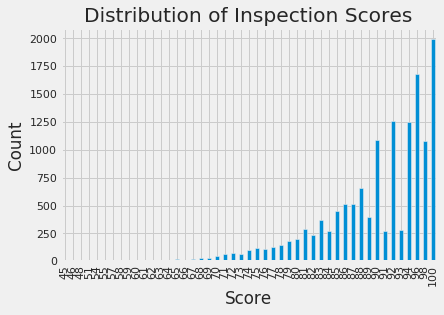

In [75]:
graph = ins.groupby('score').count()['iid'].plot(kind='bar')
graph.set_xlabel('Score')
graph.set_ylabel('Count')
graph.set_title('Distribution of Inspection Scores')

<!-- END QUESTION -->

In [76]:
#score_counts

<!-- BEGIN QUESTION -->

<br/><br/><br/>

---

### Question 6b
Describe the qualities of the distribution of the inspections scores based on your bar plot. Consider the mode(s), symmetry, tails, gaps, and anomalous values. Are there any unusual features of this distribution? What do your observations imply about the scores?

<!--
BEGIN QUESTION
name: q6b
points: 2
manual: True
-->

The most common score is 100. The distribution of scores increases exponentially as the value of the score increases, however there are some big dips for some scores in the 80s and 90s, and some scores and never given to a restraurant like 99, 97 and 95.  I think that would be due to the system of awarding points makes it impossible for a restraurant to receive that score.  

<!-- END QUESTION -->



<br/><br/><br/><br/>

---

<br/><br/>

## 7: Restaurant Ratings Over Time

Let's consider various scenarios involving restaurants with multiple ratings over time.



<br/><br/><br/>

---

### Question 7a

Let's see which restaurant has had the most extreme improvement in its rating, aka scores. Let the "swing" of a restaurant be defined as the difference between its highest-ever and lowest-ever rating. **Only consider restaurants with at least 3 ratings, aka rated for at least 3 times (3 scores)!** Using whatever technique you want to use, assign `max_swing` to the name of restaurant that has the maximum swing.

*Note*: The "swing" is of a specific business. There might be some restaurants with multiple locations; each location has its own "swing".

The city would like to know if the state of food safety has been getting better, worse, or about average. This is a pretty vague and broad question, which you should expect as part of your future job as a data scientist! However for the ease of grading for this assignment, we are going to guide you through it and offer some specific directions to consider.

<!--
BEGIN QUESTION
name: q7a
points: 2
-->

In [95]:
score_counts = ins_named['name'].value_counts().to_frame().rename(columns={'name': 'count'})

display(score_counts)

ins_named['count'] = 1

ins_name_counted = ins_named.groupby(['name'], as_index = False).agg({'count':'sum'})

ins_name_counted['score'] = ins['score']                      
ins_name_counted['score2'] = ins['score']
ins_name_counted = ins_name_counted[ins_name_counted['count'] >= 3]
display(ins_name_counted)

ins_name_counted =  ins_name_counted.groupby('name').agg({'score': 'min', 'score2':'max'})
ins_name_counted['max difference'] = ins_name_counted['score2'] - ins_name_counted['score']
ins_name_counted = ins_name_counted.sort_values('max difference', ascending=False)
display(ins_name_counted)
max_swing = ins_name_counted.index[0]
max_swing

,count
Peet's Coffee & Tea,56
Starbucks Coffee,38
Jamba Juice,26
McDonald's,26
Proper Food,24
...,...
Vendor Room 200,1
Tenroku Sushi,1
Bon Appetit @ Airbnb,1
Piccolo Forno,1


,name,count,score,score2
1,111 Minna Gallery,3,100.0,100.0
8,17th & Noe Market,3,NaN,NaN
10,18th Street Commissary,3,NaN,NaN
13,"20 Spot Mission, LLC",3,NaN,NaN
15,21 Taste House,3,83.0,83.0
...,...,...,...,...
5271,Zita,3,93.0,93.0
5272,Zpizza,3,98.0,98.0
5273,Zynga,3,96.0,96.0
5274,Zzan,3,NaN,NaN


,score,score2,max difference
name,,,
111 Minna Gallery,100.0,100.0,0.0
Popeyes Chicken & Biscuits,88.0,88.0,0.0
Pollo Campero,94.0,94.0,0.0
Poke Delish,86.0,86.0,0.0
Poke Bowl,94.0,94.0,0.0
...,...,...,...
Zantes Pizza,NaN,NaN,NaN
Zanze's Cheesecake,NaN,NaN,NaN
Zaytoon,NaN,NaN,NaN


'111 Minna Gallery'

In [ ]:
grader.check("q7a")

<br/><br/><br/>

---

### Question 7b

To get a sense of the number of times each restaurant has been inspected, create a multi-indexed dataframe called `inspections_by_id_and_year` where each row corresponds to data about a given business in a single year, and there is a single data column named count that represents the number of inspections for that business in that year. The first index in the MultiIndex should be on `bid`, and the second should be on year.

For example, a sample row in this dataframe will tell you that for `bid` 573, in `year` 2017, the total number of inspections was 4.

Hint: Use `groupby` to group based on both the `bid` and the `year`.

Hint: Use `rename` to change the name of the column to count.

<!--
BEGIN QUESTION
name: q7b
points: 1
-->

In [ ]:
#display(ins_named)
ins_named['count'] = 1
inspections_by_id_and_year = ins_named.groupby(['bid', 'year']).agg({'count':'sum'})
inspections_by_id_and_year.head(20)

In [ ]:
grader.check("q7b")

You should see that some businesses are inspected many times in a single year. Let's get a sense of the distribution of the counts of the number of inspections by calling `value_counts`. There are quite a lot of businesses with 2 inspections in the same year, so it seems like it might be interesting to see what we can learn from such businesses.

In [ ]:
inspections_by_id_and_year['count'].value_counts()

<br/><br/><br/>

---


### Question 7c

What's the relationship between the first and second scores for the businesses with 2 inspections in a year? Do they typically improve? For simplicity, let's focus on only 2018 for this problem, using `ins2018` data frame that will be created for you below.

First, make a dataframe called `scores_pairs_by_business` indexed by `business_id` (containing only businesses with exactly 2 inspections in 2018). This dataframe contains the field score_pair consisting of the score pairs ordered chronologically [first_score, second_score].

Plot these scores. That is, make a scatter plot to display these pairs of scores. Include on the plot a reference line with slope 1.

You may find the functions `sort_values`, `groupby`, `filter` and `agg` helpful, though not all necessary.

The first few rows of the resulting table should look something like:

|  **bid**   | **score_pair** |
|-----|------------|
| 48  | [94, 87]   |
| 66  | [98, 98]   |
| 146  | [81, 90]   |
| 184  | [90, 96]  |
| 273  | [83, 84]   |

In the cell below, create `scores_pairs_by_business` as described above.

Note: Each score pair must be a list type; numpy arrays will not pass the autograder.

Hint: Use the filter method from lecture 5 to create a new dataframe that only contains restaurants that received exactly 2 inspections.

Hint: Our code that creates the needed DataFrame is a single line of code that uses `sort_values`, `groupby`, `filter`, `groupby`, `agg`, and `rename` in that order. Your answer does not need to use these exact methods.

<!--
BEGIN QUESTION
name: q7ci
points: 4
-->

In [ ]:
ins2018 = ins[ins['year'] == 2018]
# Create the dataframe here

scores_pairs_by_business = ins2018.sort_values(by='date', ascending=False).groupby('bid').filter(lambda x : len(x) == 2).groupby('bid').agg(lambda x:x.tolist()).rename(columns={'score':'score_pair'}).loc[:,'score_pair'].to_frame()
scores_pairs_by_business

In [ ]:
grader.check("q7ci")

<!-- BEGIN QUESTION -->

Now, create your scatter plot in the cell below. It does not need to look exactly the same (e.g., no grid) as the sample below, but make sure that all labels, axes and data itself are correct.

![](pics/7c.png)

Key pieces of syntax you'll need:

`plt.scatter` plots a set of points. Use `facecolors='none'` and `edgecolors=b` to make circle markers with blue borders. 

`plt.plot` for the reference line.

`plt.xlabel`, `plt.ylabel`, `plt.axis`, and `plt.title`.

Hint: You may find it convenient to use the `zip()` function to unzip scores in the list.

<!--
BEGIN QUESTION
name: q7cii
points: 2
manual: True
-->

In [ ]:
one, two = zip(*scores_pairs_by_business['score_pair'])
plt.scatter(one, two, facecolors='none', edgecolors='b')
plt.plot(np.linspace(55, 100, num=100), np.linspace(55, 100, num=100), color='r')
plt.xlabel("First Score")
plt.ylabel("Second Score")
plt.title("First Inspection Score vs. Second Inspection Score")
plt.axis([55, 100, 55, 100])



<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<br/><br/><br/>


---


### Question 7d

Another way to compare the scores from the two inspections is to examine the difference in scores. Subtract the first score from the second in `scores_pairs_by_business`. Make a histogram of these differences in the scores. We might expect these differences to be positive, indicating an improvement from the first to the second inspection.

The histogram should look like this:

![](pics/7d.png)

Hint: Use `second_score` and `first_score` created in the scatter plot code above.

Hint: Convert the scores into numpy arrays to make them easier to deal with.

Hint: Use `plt.hist()` Try changing the number of bins when you call `plt.hist()`.

<!--
BEGIN QUESTION
name: q7d
points: 2
manual: True
-->

In [ ]:
one = np.array(one)
two = np.array(two)
diff = two - one
plt.hist(diff, bins=30)

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<br/><br/><br/>


---


### Question 7e

If restaurants' scores tend to improve from the first to the second inspection, what do you expect to see in the scatter plot that you made in question 7c? What do you oberve from the plot? Are your observations consistent with your expectations? 

Hint: What does the slope represent?

<!--
BEGIN QUESTION
name: q7e
points: 1
manual: True
-->

If inspection scores increase I'd expect a lot of dots to be above the line, but it seemed that there were more dots below the line.  This isn't consistent with my expectations. I would've thought more restraunts would improve.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<br/><br/><br/>

---

### Question 7f

If a restaurant's score improves from the first to the second inspection, how would this be reflected in the histogram of the difference in the scores that you made in question 7d? What do you oberve from the plot? Are your observations consistent with your expectations? Explain your observations in the language of Statistics: for instance, the center, the spread, the deviation etc.

<!--
BEGIN QUESTION
name: q7f
points: 1
manual: True
-->

If a restaurant's score improved then in the histogram they would be placed in a positive bin, but I see from the plot a lot are on zero or below zero, which isn't consistent with my expectations. The center is on about -2, with a spread from -20 to 20 with a deviation of about 10.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<br/><br/><br/>

---

### Question 7g 
To wrap up our analysis of the restaurant ratings over time, one final metric we will be looking at is the distribution of restaurant scores over time. Create a side-by-side boxplot that shows the distribution of these scores for each different risk category from 2017 to 2019. Use a figure size of at least 12 by 8.

The boxplot should look similar to the sample below. Make sure the boxes are in the correct order!

![](pics/7g.png)

**Hint**: Use `sns.boxplot()`. Try taking a look at the first several parameters. [The documentation is linked here!](https://seaborn.pydata.org/generated/seaborn.boxplot.html)

**Hint**: Use `plt.figure()` to adjust the figure size of your plot.

<!--
BEGIN QUESTION
name: q7g
points: 3
manual: True
-->

,iid,bid,name,address,score,type,timestamp,date,Missing Score,year,postal5,vid,description,risk_category
23,2664_20190613,2664.0,Alice's Restaurant,1599 Sanchez St,60.0,Routine - Unscheduled,2019-06-13,06/13/2019 12:00:00 AM,False,2019.0,94131,103108,Contaminated or adulterated food,High Risk
39,81978_20170406,81978.0,Ella's American Kitchen on Polk,1608 Polk St,63.0,Routine - Unscheduled,2017-04-06,04/06/2017 12:00:00 AM,False,2017.0,94109,103108,Contaminated or adulterated food,High Risk
53,94351_20190508,94351.0,VBowls LLC,1200 Vermont St,58.0,Routine - Unscheduled,2019-05-08,05/08/2019 12:00:00 AM,False,2019.0,94110,103108,Contaminated or adulterated food,High Risk
54,94710_20180227,94710.0,People's Bistro,1419 Haight St,62.0,Routine - Unscheduled,2018-02-27,02/27/2018 12:00:00 AM,False,2018.0,94117,103108,Contaminated or adulterated food,High Risk
55,61494_20180718,61494.0,Golden City Inn,5131 03rd St,61.0,Routine - Unscheduled,2018-07-18,07/18/2018 12:00:00 AM,False,2018.0,94124,103108,Contaminated or adulterated food,High Risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38900,71310_20181203,71310.0,Golden King Vietnamese Restaurant,757 Clay St,55.0,Routine - Unscheduled,2018-12-03,12/03/2018 12:00:00 AM,False,2018.0,94108,103149,Wiping cloths not clean or properly stored or ...,Low Risk
38941,67237_20180914,67237.0,La Jefa,445 Bayshore Blvd,51.0,Routine - Unscheduled,2018-09-14,09/14/2018 12:00:00 AM,False,2018.0,94107,103149,Wiping cloths not clean or properly stored or ...,Low Risk
38979,9679_20180608,9679.0,Eastern Bakery Inc,720 Grant Ave,63.0,Routine - Unscheduled,2018-06-08,06/08/2018 12:00:00 AM,False,2018.0,94108,103149,Wiping cloths not clean or properly stored or ...,Low Risk
39159,35702_20180306,35702.0,MENKEE WONTON,1701 Noriega St,61.0,Routine - Unscheduled,2018-03-06,03/06/2018 12:00:00 AM,False,2018.0,94122,103149,Wiping cloths not clean or properly stored or ...,Low Risk


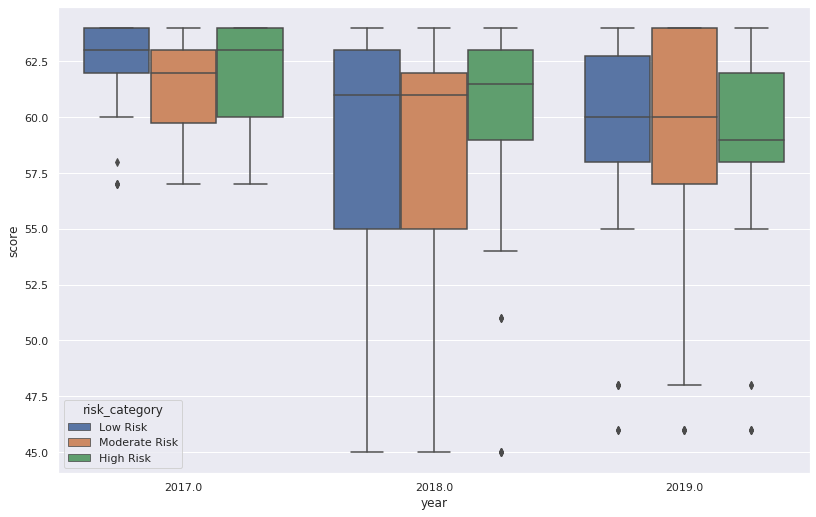

In [92]:
# Do not modify this line
sns.set()
display(final)
final = final[final['year'] != 2016]
plt.figure(figsize=(12, 8))
sns.boxplot(y=final['score'], x = final['year'], data = final, hue=final['risk_category'], hue_order=['Low Risk', 'Moderate Risk', 'High Risk'])



<!-- END QUESTION -->



## Summary of Inspections Data

We have done a lot in this project! Below are some examples of what we have learned about the inspections data through some cool visualizations!

- We found that the records are at the inspection level and that we have inspections for multiple years.
- We also found that many restaurants have more than one inspection a year.
- By joining the business and inspection data, we identified the name of the restaurant with the worst rating and optionally the names of the restaurants with the best rating.
- We identified the restaurant that had the largest swing in rating over time.
- We also examined the change of scores over time! Many restaurants are not actually doing better.

<!-- BEGIN QUESTION -->

<br/><br/><br/>

---

<br/><br/><br/>

# 8: Open Ended Question 
## Question 8a

### Compute Something Interesting

Play with the data and try to compute something interesting about the data. Please try to use at least one of groupby, pivot, or merge (or all of the above).  

Please show your work in the cell below and describe in words what you found in the same cell. This question will be graded leniently but good solutions may be used to create future homework problems.

### Grading ###

Since the question is more open ended, we will have a more relaxed rubric, classifying your answers into the following three categories:

- **Great** (4 points): Uses a combination of pandas operations (such as groupby, pivot, merge) to answer a relevant question about the data. The text description provides a reasonable interpretation of the result.
- **Passing** (1-3 points): Computation is flawed or very simple. The text description is incomplete but makes some sense.
- **Unsatisfactory** (0 points): No computation is performed, or a computation with completely wrong results.


**Please have both your code and your explanation in the same one cell below. Any work in any other cell will not be graded.**


<!--
BEGIN QUESTION
name: q8a
points: 4
manual: True
-->



In [ ]:
#YOUR CODE HERE

ins_and_bus = pd.merge(bus, ins, how='inner', on='bid')
average_score_by_zip = ins_and_bus.groupby('postal5').agg({'score':'mean'})
average_score_by_zip = average_score_by_zip.sort_values('score')
display(average_score_by_zip)
ins.iloc[0]

#YOUR EXPLANATION HERE (in a comment)
"""average_score_by_zip has the average score for inspections by zip code. I found out that all of the restraunts in 94129 have a perfect record for inspections as well as all the other average scores
for inspections in each zip code. 94121 has the worst average with 88."""

<!-- END QUESTION -->



<br/><br/><br/><br/>

---

<br/><br/>

## Question 8b 

### Create some more cool visualizations!

<br/>

Play with the data, and try to produce some visualizations to answer one question that you find interesting regarding the data. You might want to use `merge`/`groupby`/`pivot` to process the data before creating visualizations.

Please show your work in the cells below (feel free to use extra cells if you want), and describe in words what you found in the same cell. This question will be graded leniently, but good solutions may be used to create future homework problems. 




<!-- BEGIN QUESTION -->

### Grading ###

Since the question is more open ended, we will have a more relaxed rubric, classifying your answers into the following three categories:

- **Great** (4 points): The chart is well designed, and the data computation is correct. The text written articulates a reasonable metric and correctly describes the relevant insight and answer to the question you are interested in.
- **Passing** (1-3 points): A chart is produced but with some flaws such as bad encoding. The text written is incomplete but makes some sense.
- **Unsatisfactory** (0 points): No chart is created, or a chart with completely wrong results.

We will lean towards being generous with the grading. We might also either discuss in discussion or post on Piazza some examplar analysis you have done (with your permission)!

You should have the following in your answers:
* a few visualizations; Please limit your visualizations to 5 plots.
* a few sentences (not too long please!)

Please note that you will only receive support in OH and Piazza for Matplotlib and seaborn questions. However, you may use some other Python libraries to help you create you visualizations. If you do so, make sure it is compatible with the PDF export (e.g., Plotly does not create PDFs properly, which we need for Gradescope).

<!--
BEGIN QUESTION
name: q8b
points: 4
manual: True
-->

In [ ]:
#### YOUR DATA PROCESSING AND PLOTTING HERE
location = bus.groupby('postal5').count().sort_values(by='bid')
location.plot.bar(y='bid')
final['postal5'] = bus['postal5']
display(final, bus['postal5'])

final = final[final['risk_category'] == 'High Risk']
final = final.groupby(['postal5', 'risk_category']).count().sort_values(by='bid')
final.plot.bar(y='bid', figsize=(12, 12))


# YOUR EXPLANATION HERE (in a comment)
"""In the first plot we see that 94103 and 94110 both have the most restraunts and then there's a steep drop off then consistent 
decline, for few zip codes then another drop off followed by a consistent decline to almost zero. The second graph counts the number 
of high risk violations by zip code and we found that 94103 has the most high risk violations, which is fairly consistent with 
the observations in 8a because 94103 had an average score of 90 which is only 2 points above the lowest, while suprisingly, the zip code with the worst average was in the middle of the road for the number of high risk violations."""

<!-- END QUESTION -->

In [ ]:
# THIS CELL AND ANY CELLS ADDED BELOW WILL NOT BE GRADED

## Congratulations! You have finished Project 1! ##

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [ ]:
grader.check_all()

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export("proj1.ipynb")